In [299]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#***Load Dataset***

In [300]:
file_path = '/content/supermarket_sales.csv'
df = pd.read_csv(file_path)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


#***Details Info about dataset***
##***Showing Missing values, Duplicate values, Data Describe, Data Info, Categorical Variables etc.***

In [301]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [302]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               994 non-null    float64
 7   Quantity                 997 non-null    float64
 8   Tax 5%                   998 non-null    float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     986 non-null    float64
 14  gross margin percentage  

In [304]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,994.000000,997.000000,998.000000,1000.000000,986.000000,1.000000e+03,998.000000,992.000000
mean,55.669920,5.502508,15.386835,322.966749,307.967434,4.761905e+00,15.397958,6.977117
std,26.469551,2.923599,11.717056,245.885335,233.628731,6.131498e-14,11.713066,1.721160
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.975000,3.000000,5.864625,124.422375,119.690000,4.761905e+00,5.960500,5.500000
50%,55.230000,5.000000,12.088000,253.848000,242.460000,4.761905e+00,12.123000,7.000000
75%,77.877500,8.000000,22.475750,471.350250,449.515000,4.761905e+00,22.475750,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [305]:
df.shape

(1000, 17)

In [306]:
df.duplicated().sum()

0

In [307]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,6
Quantity,3
Tax 5%,2
Total,0


In [308]:
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("\n")

Unique values in column 'Branch':
['A' 'C' 'B']


Unique values in column 'City':
['Yangon' 'Naypyitaw' 'Mandalay']


Unique values in column 'Customer type':
['Member' 'Normal']


Unique values in column 'Gender':
['Female' 'Male']


Unique values in column 'Product line':
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


Unique values in column 'Payment':
['Ewallet' 'Cash' 'Credit card']




In [309]:
df = df.drop(columns=['Date', 'Time','Invoice ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               994 non-null    float64
 6   Quantity                 997 non-null    float64
 7   Tax 5%                   998 non-null    float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     986 non-null    float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             998 non-null    float64
 13  Rating                   992 non-null    float64
dtypes: float64(8), object(6)


In [310]:
df_clean = df.dropna(subset=['gross income'])

In [311]:
df_clean.isnull().sum()

,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,6
Quantity,3
Tax 5%,2
Total,0
Payment,0


In [312]:
df=df_clean

# ***Define features (X) and target (y) and perform train test split***

In [313]:
X = df.drop(columns=['gross income'])
y = df['gross income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***Define columns***


In [314]:
## For missing values
numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'cogs','Rating']
## To handle categorical variable
ordinal_columns = ['Customer type']
nominal_columns = ['Branch', 'City', 'Gender', 'Product line', 'Payment']

# ***Create Transformation Steps***

In [315]:
## Display Pipeline
from sklearn import set_config
set_config(display='diagram')

## ***trf1 for missing value handle and encodiing categorical variable***

In [316]:
## Perform Imputer for missing value.Also Ordinal encoder and one-hot encoding for handle categorical varibale
trf1 = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='mean'), numeric_columns),
    ('ordinal_encoder', OrdinalEncoder(), ordinal_columns),
    ('nominal_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_columns)
])

In [317]:
trf1

ColumnTransformer(transformers=[('num_imputer', SimpleImputer(),
                                 ['Unit price', 'Quantity', 'Tax 5%', 'cogs',
                                  'Rating']),
                                ('ordinal_encoder', OrdinalEncoder(),
                                 ['Customer type']),
                                ('nominal_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Branch', 'City', 'Gender', 'Product line',
                                  'Payment'])])

In [318]:
## Scaling
trf2 = ColumnTransformer([
    ('Scale', MinMaxScaler(), slice(0, len(df.columns)))
])

In [319]:
trf2

ColumnTransformer(transformers=[('Scale', MinMaxScaler(), slice(0, 14, None))])

In [320]:
## Feature Selection
## After performing one hot encodding column will be total 26. So here k = 25
trf3 = SelectKBest(score_func=f_regression, k=23)

In [321]:
trf3

SelectKBest(k=23, score_func=<function f_regression at 0x7b82d0184160>)

In [322]:
trf4 = GradientBoostingRegressor()

In [323]:
trf5 = XGBRegressor()

# ***Create Pipeline***

In [324]:
pipe1 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])
pipe2 = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf5', trf5)
])


# ***Fit the Pipeline***

In [325]:
pipe1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(),
                                                  ['Unit price', 'Quantity',
                                                   'Tax 5%', 'cogs',
                                                   'Rating']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Customer type']),
                                                 ('nominal_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Branch', 'City', 'Gender',
                                                   'Product line',
                                                   'Payment'])])),
                ('trf2',
                 ColumnTransformer(transformers=[('Scale', MinMaxScaler(),
                                                  slice(0, 14, None))])),
                ('trf3',
                 SelectKBest(k=23,
                             score_func=<function f_regression at 0x7b82d0184160>)),
                ('trf4', GradientBoostingRegressor())])

In [326]:
pipe2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(),
                                                  ['Unit price', 'Quantity',
                                                   'Tax 5%', 'cogs',
                                                   'Rating']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Customer type']),
                                                 ('nominal_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Branch', 'City', 'Gender',
                                                   'Product line',
                                                   'Payment'])])),
                ('trf2',
                 ColumnTransformer(...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [327]:
pipe1.named_steps

{'trf1': ColumnTransformer(transformers=[('num_imputer', SimpleImputer(),
                                  ['Unit price', 'Quantity', 'Tax 5%', 'cogs',
                                   'Rating']),
                                 ('ordinal_encoder', OrdinalEncoder(),
                                  ['Customer type']),
                                 ('nominal_encoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Branch', 'City', 'Gender', 'Product line',
                                   'Payment'])]),
 'trf2': ColumnTransformer(transformers=[('Scale', MinMaxScaler(), slice(0, 14, None))]),
 'trf3': SelectKBest(k=23, score_func=<function f_regression at 0x7b82d0184160>),
 'trf4': GradientBoostingRegressor()}

In [328]:
pipe2.named_steps

{'trf1': ColumnTransformer(transformers=[('num_imputer', SimpleImputer(),
                                  ['Unit price', 'Quantity', 'Tax 5%', 'cogs',
                                   'Rating']),
                                 ('ordinal_encoder', OrdinalEncoder(),
                                  ['Customer type']),
                                 ('nominal_encoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Branch', 'City', 'Gender', 'Product line',
                                   'Payment'])]),
 'trf2': ColumnTransformer(transformers=[('Scale', MinMaxScaler(), slice(0, 14, None))]),
 'trf3': SelectKBest(k=23, score_func=<function f_regression at 0x7b82d0184160>),
 'trf5': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None

In [329]:
y_pred1 = pipe1.predict(X_test)
y_pred2 = pipe2.predict(X_test)

# ***Evaluate the model using MAE and MSE***

In [330]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test,y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print("R^2 Score:", r2)

Mean Absolute Error: 0.07046721017424538
Mean Squared Error: 0.010125125166185064
R^2 Score: 0.9999206009302002


In [331]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test,y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print("R^2 Score:", r2)

Mean Absolute Error: 0.11372242305278782
Mean Squared Error: 0.03597456636560478
R^2 Score: 0.99971789513127


# ***Cross-validation for GradientBoostingRegressor***

In [332]:
from sklearn.model_selection import cross_val_score
scores_gb_mae = -1 * cross_val_score(pipe1, X, y, cv=5, scoring='neg_mean_absolute_error')
scores_gb_mse = -1 * cross_val_score(pipe1, X, y, cv=5, scoring='neg_mean_squared_error')

print("GradientBoostingRegressor MAE scores:\n", scores_gb_mae)
print("GradientBoostingRegressor Average MAE score:", scores_gb_mae.mean())

print("GradientBoostingRegressor MSE scores:\n", scores_gb_mse)
print("GradientBoostingRegressor Average MSE score:", scores_gb_mse.mean())



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/

GradientBoostingRegressor MAE scores:
 [0.06969951 0.13276825 0.26744283 0.0856367  0.07121853]
GradientBoostingRegressor Average MAE score: 0.1253531669295882
GradientBoostingRegressor MSE scores:
 [0.0088423  0.41685142 3.46176932 0.0142582  0.00951372]
GradientBoostingRegressor Average MSE score: 0.7822469923549723


# ***Cross-validation for XGBRegressor***

In [333]:
scores_xgb_mae = -1 * cross_val_score(pipe2, X, y, cv=5, scoring='neg_mean_absolute_error')
scores_xgb_mse = -1 * cross_val_score(pipe2, X, y, cv=5, scoring='neg_mean_squared_error')


print("XGBRegressor MAE scores:\n", scores_xgb_mae)
print("XGBRegressor Average MAE score:", scores_xgb_mae.mean())

print("XGBRegressor MSE scores:\n", scores_xgb_mse)
print("XGBRegressor Average MSE score:", scores_xgb_mse.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(
/usr/local/lib/

XGBRegressor MAE scores:
 [0.11168343 0.15855787 0.13399188 0.12766621 0.11642066]
XGBRegressor Average MAE score: 0.12966400885085727
XGBRegressor MSE scores:
 [0.03328893 0.43455184 0.09544452 0.04888297 0.04036376]
XGBRegressor Average MSE score: 0.13050640243093026


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=23 is greater than n_features=14. All the features will be returned.
  warnings.warn(


# ***Checking datainfo about pipe1***

In [334]:
feature_names = pipe1.named_steps['trf1'].get_feature_names_out()
feature_names

array(['num_imputer__Unit price', 'num_imputer__Quantity',
       'num_imputer__Tax 5%', 'num_imputer__cogs', 'num_imputer__Rating',
       'ordinal_encoder__Customer type', 'nominal_encoder__Branch_A',
       'nominal_encoder__Branch_B', 'nominal_encoder__Branch_C',
       'nominal_encoder__City_Mandalay',
       'nominal_encoder__City_Naypyitaw', 'nominal_encoder__City_Yangon',
       'nominal_encoder__Gender_Female', 'nominal_encoder__Gender_Male',
       'nominal_encoder__Product line_Electronic accessories',
       'nominal_encoder__Product line_Fashion accessories',
       'nominal_encoder__Product line_Food and beverages',
       'nominal_encoder__Product line_Health and beauty',
       'nominal_encoder__Product line_Home and lifestyle',
       'nominal_encoder__Product line_Sports and travel',
       'nominal_encoder__Payment_Cash',
       'nominal_encoder__Payment_Credit card',
       'nominal_encoder__Payment_Ewallet'], dtype=object)

In [335]:
feature_names = pipe1.named_steps['trf1'].get_feature_names_out()
num_selected_features = pipe1.named_steps['trf3'].get_support().sum()

print(f"Total number of features after one-hot encoding: {len(feature_names)}")
print(f"Number of features selected by SelectKBest: {num_selected_features}")

Total number of features after one-hot encoding: 23
Number of features selected by SelectKBest: 14


# ***Actual vs Predicted Gross Income for Both Models***

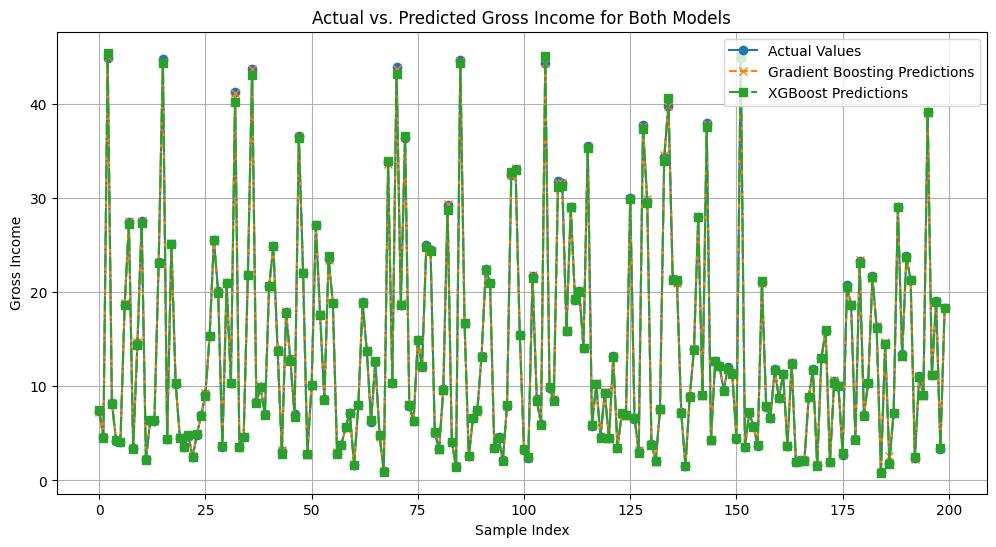

In [336]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(y_test.values, label='Actual Values', marker='o', linestyle='-')
plt.plot(y_pred1, label='Gradient Boosting Predictions', marker='x', linestyle='--')
plt.plot(y_pred2, label='XGBoost Predictions', marker='s', linestyle='-.')

plt.xlabel('Sample Index')
plt.ylabel('Gross Income')
plt.title('Actual vs. Predicted Gross Income for Both Models')
plt.legend()
plt.grid(True)
plt.show()

# ***Exporting the pipeline***

In [363]:
import pickle
pickle.dump(pipe1, open('pipe1.pkl', 'wb'))
pickle.dump(pipe2, open('pipe2.pkl', 'wb'))

In [364]:
pipe1 = pickle.load(open('pipe1.pkl', 'rb'))
pipe2 = pickle.load(open('pipe2.pkl', 'rb'))

In [365]:
test_data = pd.DataFrame({
    'Branch': ['A'],
    'City': ['Yangon'],
    'Customer type': ['Member'],
    'Gender': ['Female'],
    'Product line': ['Health and beauty'],
    'Unit price': [74.69],
    'Quantity': [7.0],
    'Tax 5%': [26.1415],
    'Total': [548.9715],
    'Payment': ['Ewallet'],
    'cogs': [522.83],
    'Rating': [9.1]
})


# Make the prediction
predicted_gross_income1 = pipe1.predict(test_data)
predicted_gross_income2 = pipe2.predict(test_data)
print(f"Actual Gross Income in dataset:26.1415")
print(f"Predicted Gross Income1: {predicted_gross_income1[0]}")
print(f"Predicted Gross Income2: {predicted_gross_income2[0]}")

Actual Gross Income in dataset:26.1415
Predicted Gross Income1: 26.118068348506366
Predicted Gross Income2: 26.143829345703125
